The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


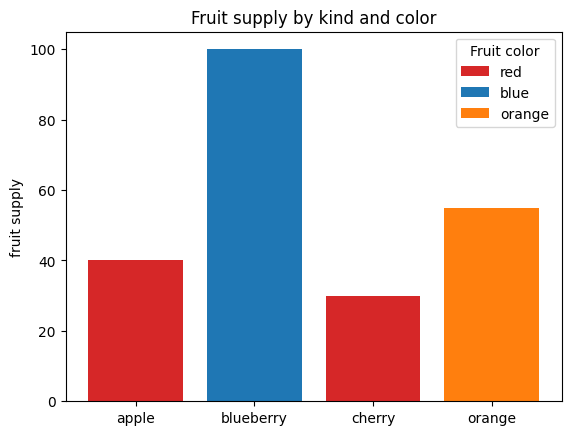

In [1]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.savefig('graph.eps', format='eps', dpi=1200)

In [86]:
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

import numpy as np

def Y(r):
    return np.array((1+2*r,2))

def Z(r):
    return np.array((4*r,5*r))

def X(r):
    return np.array((3-3*r, 5))

def W(r):
    return np.array((r,1-r))

def graph_bargaining_set(plot, r):
    return graph_convex_hull(plot, np.array([X(r),Y(r),Z(r),W(r)]))

def threat_point(r):
    if r > 3/7:
        return ((11 * r * r + r)/8 * r - 2, 2)
    else:
        return (4*r, 2)

def graph_threat_point(plt, r):
    plt.plot(threat_point(r), color="red")

    

def graph_convex_hull(plt, points, labels=['X','Y','Z','W']):
    hull = ConvexHull(points)
    plt.plot(points[:,0], points[:,1], 'o', color="black")
    for i in range(len(labels)):
        label = labels[i]
        point = points[i]
        plt.annotate(label, point + (-0.05,0.2))
    
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
        plt.fill(points[hull.vertices,0], points[hull.vertices,1], 'k', alpha=0.1, color="red")
    return plt



#plt = graph_convex_hull(plt, np.array([[0,0],[4,1],[1,1],[1,0], [1,0.4]]))

C:\Users\akesh\AppData\Local\Temp\ipykernel_14788\1254054358.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.fill(points[hull.vertices,0], points[hull.vertices,1], 'k', alpha=0.1, color="red")


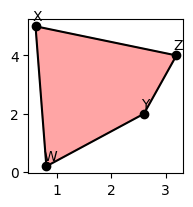

In [87]:
plt = graph_bargaining_set(plt,0.8)

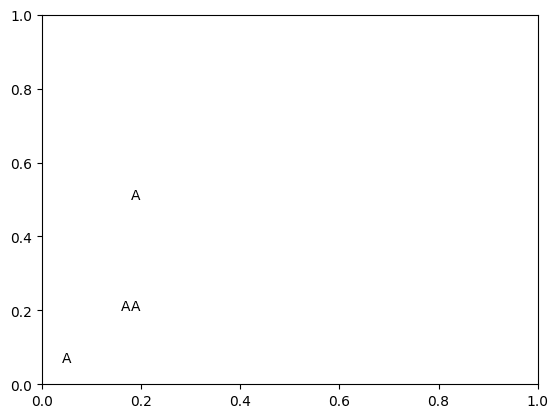

In [47]:
r = 0.4
points = np.array([X(r),Y(r),Z(r),W(r)])
# plt.text(points[:,0], points[:,1], "X", fontsize=9)
ax = plt.gca()
for point in points:
    ax.annotate('A', point/10)
plt.show()

0


C:\Users\akesh\AppData\Local\Temp\ipykernel_14788\4078125800.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.fill(points[hull.vertices,0], points[hull.vertices,1], 'k', alpha=0.1, color="red")


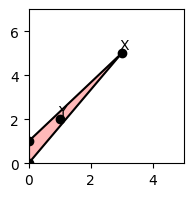

0.4


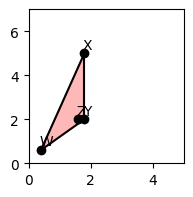

0.42857142857142855


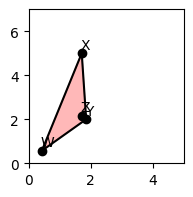

0.47


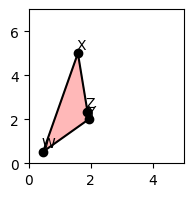

0.5


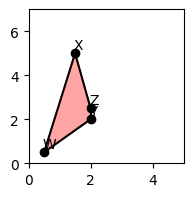

0.78


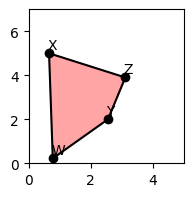

1


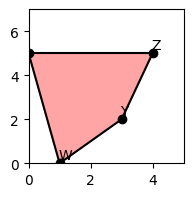

In [83]:
import matplotlib.pyplot as plt
rs = [0, 0.4, 3/7, 0.47, 0.5, 0.78, 1]

for r in rs:
    plt.rcParams["figure.figsize"] = (2,2)
    plt.xlim(0, 5)
    plt.ylim(0, 7)
    print(r)
    plt = graph_bargaining_set(plt, r)
    plt = graph_threat_point(plt, r)
    